# 手書き文字認識
<p>手書きの数字画像をニューラルネットワークに学習させて、自動認識させる</p>

### １．ライブラリ読み込み

In [1]:
%matplotlib inline
from __future__ import division, print_function
from keras import backend as K
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\yuz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### ２． Kerasからデータを取得

In [2]:
# 手書き数字画像データ読み込み
np.random.seed(0)
(X_train, labels_train), (X_test, labels_test) = mnist.load_data()

In [3]:
# 学習用データのラベルを確認
labels_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# 学習用データの配列の大きさを確認
print(X_train.shape, labels_train.shape, sep='\n')

(60000, 28, 28)
(60000,)


In [5]:
# テスト用データの配列の大きさを確認
print(X_test.shape, labels_test.shape, sep='\n')

(10000, 28, 28)
(10000,)


### ３．画像を表示して確認

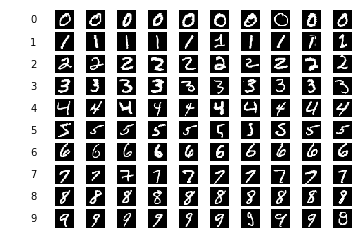

In [6]:
# 学習用データの画像を表示

import matplotlib.pyplot as plt

label_images = {label: [] for label in set(labels_train.tolist())}
for x, label in zip(X_train, labels_train):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

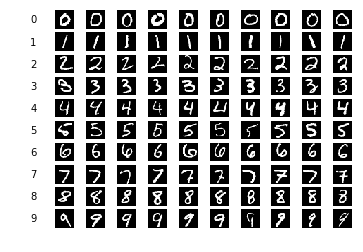

In [7]:
# Test dataの画像表示

import matplotlib.pyplot as plt

label_images = {label: [] for label in set(labels_test.tolist())}
for x, label in zip(X_test, labels_test):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

### ４．画像データを特徴ベクトルへ変換

In [8]:
# 各画像をベクトルに変換して、X_trainとX_testを作成
n_samples_train = len(X_train)
n_samples_test = len(X_test)
X_train = X_train.reshape((n_samples_train,-1))
X_test = X_test.reshape((n_samples_test,-1))
print(X_train.shape,X_test.shape)
print(X_test)

(60000, 784) (10000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
# ラベルをone-hotベクトルに変換して、y_trainとy_testを作成
y_train = to_categorical(labels_train)
y_test = to_categorical(labels_test)

### ５．ニューラルネットワークの学習

In [10]:
# 多層パーセプトロンモデルの準備
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# 学習の実施
model.fit(X_train, y_train, nb_epoch = 30, batch_size = 128)

Epoch 1/30
12032/60000 [=====>........................] - ETA: 0s - loss: 0.1458 - acc: 0.9532

C:\Users\yuz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 1s 12us/step - loss: 0.1526 - acc: 0.9528
Epoch 2/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1532 - acc: 0.9516
Epoch 3/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1481 - acc: 0.9541
Epoch 4/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1470 - acc: 0.9534
Epoch 5/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1456 - acc: 0.9546
Epoch 6/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1489 - acc: 0.9535
Epoch 7/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1482 - acc: 0.9538
Epoch 8/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1499 - acc: 0.9531
Epoch 9/30
60000/60000 [==============================] - 1s 12us/step - loss: 0.1461 - acc: 0.9546
Epoch 10/30
60000/60000 [==============================] - 1s 13us/step - loss: 0.1459 - acc: 0.9550
Epoch 11/3

### ６．モデルの精度確認

In [21]:
# テスト用データでモデルを評価（正解率を算出）
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.9413


In [22]:
# 混合行列と評価結果を表示
labels_pred = model.predict_classes(X_test, verbose=0)
print(confusion_matrix(labels_test, labels_pred))
print(classification_report(labels_test, labels_pred))

[[ 966    0    3    1    1    1    3    2    3    0]
 [   0 1119    5    2    0    0    2    1    6    0]
 [   7    2  981   15    5    5    5    5    7    0]
 [   1    3   23  948    2    8    1   11   12    1]
 [   1    1    9    3  922    2   10    6    6   22]
 [   9    4    0   28    7  793   14    7   24    6]
 [   9    3    5    0    3   10  923    0    5    0]
 [   1    8   19    6    3    2    1  974    0   14]
 [  11    8   20   31    5   12   11    9  865    2]
 [  10    6    0   10   28    4    1   15   13  922]]
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       980
          1       0.97      0.99      0.98      1135
          2       0.92      0.95      0.94      1032
          3       0.91      0.94      0.92      1010
          4       0.94      0.94      0.94       982
          5       0.95      0.89      0.92       892
          6       0.95      0.96      0.96       958
          7       0.95      0.95      0.95  

### ７． 学習済みモデルで新規画像の数字を予測

In [23]:
import numpy as image_np
from PIL import Image

In [24]:
# 新規画像の取得・数値変換
io1 = Image.open("dataset/number_file/handnumber1.jpg")
io2 = Image.open("dataset/number_file/handnumber2.jpg")
io3 = Image.open("dataset/number_file/handnumber3.jpg")
io4 = Image.open("dataset/number_file/handnumber4.jpg")
io1 = io1.convert("L")
io2 = io2.convert("L")
io3 = io3.convert("L")
io4 = io4.convert("L")
img1 = image_np.asarray(io1)
img2 = image_np.asarray(io2)
img3 = image_np.asarray(io3)
img4 = image_np.asarray(io4)

In [25]:
print(io1)
print(img1.shape)

<PIL.Image.Image image mode=L size=28x28 at 0x123EB518>
(28, 28)


In [26]:
# 数値を1行に変換
X1 = img1.reshape(1, len(img1)**2)
X2 = img2.reshape(1, len(img2)**2)
X3 = img3.reshape(1, len(img3)**2)
X4 = img4.reshape(1, len(img4)**2)
print(X1.shape)
a = image_np.append(X1,X2)
b = image_np.append(a,X3)
c = image_np.append(b,X4)
X5 = c.reshape(4, 784)
print(X5.shape)
print(X5)

(1, 784)
(4, 784)
[[255 255 255 ... 104 247 255]
 [255 254 255 ... 255 255 255]
 [251 255 255 ... 255 255 255]
 [254 255 255 ... 255 252 255]]


In [27]:
# 新規画像をモデルに入れて予測
X5_pred = model.predict_classes(X5, verbose = 1)

4/4 [==============================] - 0s 0us/step


[1 5 5 5]


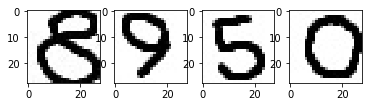

In [28]:
# 画像を読み込んだで正誤判定
print(X5_pred)
from matplotlib import pylab as plt
plt.subplot(141) # 複数の描画（1行3列の1番目に描画） 
plt.imshow(io1)
plt.subplot(142) # 複数の描画（1行3列の2番目に描画） 
plt.imshow(io2)
plt.subplot(143) # 複数の描画（1行3列の3番目に描画） 
plt.imshow(io3)
plt.subplot(144) # 複数の描画（1行3列の4番目に描画） 
plt.imshow(io4)

## ～分析から分かった事～
- ＜結論１＞
    - 多層パーセプトロンモデルのニューラルネットワークを学習した結果、<br>対テストデータで<font color="Red">精度、正解率共に94%</font>に到達。

- ＜結論２＞
    - しかし新規画像4枚に対しては、予測的中が4枚中1枚、<font color="Red">正答率25%</font>となってしまった<br>
        - 学習データが新規画像の特徴（数字が枠一杯に広がっている）を備えていない⇒学習データに偏りが有った為か